# NumPy

NumPy (Numerical Python) es un módulo de Python para cómputo científico. Esta biblioteca contiene muchas funciones útiles en computación científica entre las que se encuentran manipulación de arreglos numéricos, operaciones de álgebra lineal y generación de números pseudo-aleatorios. 

Para poder usar NumPy debemos importarlo, la forma más común de importar NumPy es asignándole el alias `np`:

In [1]:
import numpy as np

## Arreglos

NumPy usa una estructura de datos llamada arreglos (_arrays_). Los arreglos de NumPy son similares a las listas de Python, pero son más eficientes para realizar tareas numéricas. La eficiencia deriva de las siguientes características:

* Las listas de Python son muy generales, pudiendo contener objetos de distinto tipo. Los arreglos de NumPy son **homogéneos** solo pueden contener objetos de un mismo tipo.

* En una lista de Python los objetos son asignados dinamicamente, es decir el tamaño de una lista no está predefinidos, siempre podemos agregar más y más elementos. Por el contrario los arreglos de NumPy son **estáticos**. 

Estos dos primeros puntos permiten hacer uso eficiente de la memoria

* Otra razón por la cual los arreglos son más eficientes que las listas es que en Python todo es un objeto, incluso los números! Por ejemplo en C un entero es esencialmente un rótulo que conecta un lugar en la memoria de la computadora cuyos _bytes_ se usan para codificar el valor de ese entero. Sin embargo en Python un entero es un objeto más complejo que contiene más información que simplemente el valor de un número. Esto da flexibilidad a Python, pero a cambio de pagar un costo en términos computacionales. Python es en general un lenguaje más lento que lenguages como C o Fortran. Este costo es aún mayor cuando combinamos muchos de estos objetos en un objeto más complejo, como por ejemplo enteros dentro de una lista.

Otra ventaja de los arreglos es que se comportan de forma similar a los vectores y matrices usados en matemática. Esto facilita muchas de las tareas científicas, precisamente por que el álgebra lineal es el lenguaje usado para pensar y resolver muchos problemas científicos de forma eficiente.



<a href="https://xkcd.com/1838/">
<img src='imagenes/ml_al.png' width=250 >
</a>


### Creando arreglos

Existen varias rutinas para [crear](http://docs.scipy.org/doc/numpy/reference/routines.array-creation.html) arreglos de NumPy a partir de:

* Listas o tuplas de Python
* Rangos numéricos
* Números aletorios
* Ceros y unos
* Archivos

#### A partir de listas y tuplas

Para crear arreglos a partir de listas (o tuplas) podemos usar la funcion `array`:

In [2]:
v = np.array([1, 2, 3, 4 , 5, 6])
v

array([1, 2, 3, 4, 5, 6])

In [3]:
M = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
M

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

El primer arreglo, `v`, lo creamos a partir de una lista y es por lo tanto unidimensional, mientras que el segundo `M` lo creamos a partir de una lista anidada (una lista de listas) y resulta en un arreglo bidimensional.

Los arreglos tienen `atributos` como por ejemplo `shape`:

In [4]:
v.shape, M.shape

((6,), (3, 3))

El `shape` nos indica la candidad de elemenos en cada _eje_ (o `axis`). En 2 dimensiones podemos pensarlo como el número de _(filas, columnas)_.

Tambien podemos preguntarle a un `array` cual es su dimensión:

In [5]:
v.ndim  # v es unidimensional

1

In [6]:
M.ndim  # M es bidimensional

2

#### A partir de un rango numérico

Otra forma de crear arreglos es usando rangos. Por ejemplo podemos crear un arreglo conteniendo números igualmente espaciados en el intervalo [desde, hasta), usando `arange`.

In [7]:
np.arange(0, 10, 1)  # desde, hasta(sin incluir), paso (el paso es opcional!)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Otra función para crear rangos es **linspace** que devuelve numeros igualmente espacios en el intervalo [desde, hasta] (es decir incluyendo el _hasta_). Otra diferencia con **arange** es que no se especifica el _paso_ si no la cantidad total de números que contendrá el arreglo.

In [8]:
np.linspace(1, 10, 25)  # desde, hasta, elementos (elementos es opcional)

array([ 1.   ,  1.375,  1.75 ,  2.125,  2.5  ,  2.875,  3.25 ,  3.625,
        4.   ,  4.375,  4.75 ,  5.125,  5.5  ,  5.875,  6.25 ,  6.625,
        7.   ,  7.375,  7.75 ,  8.125,  8.5  ,  8.875,  9.25 ,  9.625,
       10.   ])

#### A partir de números aleatorios

Los números aleatorios son usados en muchos problemas científicos. En la práctica las computadoras son solo capaces de generar números pseudo-aleatorios. Python usa un algortimo llamado [Mersenne Twister](https://en.wikipedia.org/wiki/Mersenne_twister) para generar números pseudo-aleatorios. Este algorítmo es más que suficiente para fines científicos, pero no es útil en caso que necesitemos números pseudo-aleatorios para usar en criptografía. Resumiendo para nuestros fines podemos asumir que los números pseudo-aleatorios que generaremos a lo largo del curso son realmente números aleatorios. 

Todas las rutinas de NumPy para generar números aleatorios _viven_ dentro del módulo [random](http://docs.scipy.org/doc/numpy/reference/routines.random.html). 

La función mas simple es `rand`. Esta función crea un arreglo de números en el intervalo [0, 1). Dentro de ese intervalo los números son equiprobables, es decir es una distribución uniforme. El argumento de `rand` son las dimensiones del arreglo resultante.

In [9]:
np.random.rand(2, 5)  # arreglo con forma (2, 5)

array([[0.6158021 , 0.51152514, 0.75899773, 0.95147265, 0.91659123],
       [0.8283128 , 0.55553375, 0.99401538, 0.15684962, 0.82768819]])

De forma similar `randn` (noten la **n** al final) devuelve muestras a partir de la distribución normal estándar (media = 0, desviación estándar = 1), según las dimensiones que especifiquemos.

In [10]:
np.random.randn(10)

array([ 1.33902588,  0.72894981,  1.50953273,  1.25460467, -0.11576736,
        1.82006303,  1.37921848,  1.28392421, -1.16966205, -0.03019015])

#### Creando arreglos con ceros y unos

En Python es común crear una lista vacía que luego se llena de elementos en un loop. En NumPy es común crear un arreglo del tamaño necesario y luego llenarlo de valores. Para estas situaciones resulta conveniente tener a mano funciones que crean arreglos con ceros o unos.

In [11]:
np.zeros((2, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [12]:
np.ones((2, 4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [13]:
np.zeros_like(M)  # noten que los ceros no tienen ".", es decir son enteros, ¿Por qué?

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [14]:
np.full((2, 4), 42.)

array([[42., 42., 42., 42.],
       [42., 42., 42., 42.]])

#### Creando arreglos con ceros y unos

Existen al menos un par de funciones para crear arreglos de NumPy desde archivos, la más versatil de ellas es `genfromtxt`:

In [15]:
datos = np.genfromtxt('datos/microbioma.csv', delimiter=','
                      , skip_header=1, usecols=(1,2,3,4), dtype='int')

In [16]:
datos.shape

(70, 4)

In [17]:
datos[:4]

array([[   1,    0,  136, 4182],
       [   2,    1, 1174,  703],
       [   3,    0,  408, 3946],
       [   4,    1,  831, 8605]])

Leamos el archivo `microbioma.csv` pero esta vez pasando menos argumentos que en el caso anterior:

    np.genfromtxt('datos/microbioma.csv', delimiter=',')
    
**¿Cuál son las diferencias entre ambos arreglos?**

**¿Cómo se explican los `nan`?**
<br>
<br>
<br>
<br>
Tip: al menos bajo Linux, es posible usar las celdas de una notebook para ejecutar comandos como si fuese una _terminal_ (o _linea de comandos_), por ejemplo podemos ejecutar el comando `head` para ver en encabezado de un archivo.

In [18]:
!head -4 datos/microbioma.csv

Taxon,Paciente,Grupo,Tejido,Heces
Firmicutes,1,0,136,4182
Firmicutes,2,1,1174,703
Firmicutes,3,0,408,3946


## Indexado y rebanado de arreglos

Los arreglos de NumPy, al igual que las listas, se pueden indexar y se pueden rebanar (_slices_). Por ejemplo la siguiente sintáxis funciona de la misma manera sin importar si M es un arreglo o una lista.

In [19]:
M[0]  # el primer elemento de M

array([1, 2, 3])

La sintaxis usada para indexar y rebanar es una generalización de la usada para las listas de Python. Esta generalización facilita trabajar con arreglos de más de 1 dimensión. Trabajar con más de una o dos dimensiones puede ser un poco confuso, sobre todo al principio ¡Aunque no necesariamente solo al principio!

La siguiente expresión es válida para arreglos

In [20]:
M[0, 1] # el elemento (0, 1) de M
        # o también la primer fila de M y de ella el segundo elemento

2

Sin embargo esta expresión no es válida para listas.

**¿Cuál es la expresión equivalente que funciona con listas?**
<br>
<br>
<br>
<br>

En la siguiente celda tenemos un ejemplo de una expresión que es común a listas y arreglos.

In [21]:
M[1:]  # a partir de la fila 1 todo

array([[4, 5, 6],
       [7, 8, 9]])

Y este es un ejemplo de rebanado que funciona con arreglos, pero no con listas.

In [22]:
M[1,:]  # solo la fila 1 (o la fila 1 en el primer axis y todo en el resto de los axis)

array([4, 5, 6])

El poder rebanar/indexar en varias dimensiones en simultaneo nos da flexibilidad para trabajar con subconjuntos de datos contenidos en un arreglo. Veamos más ejemplos:

In [23]:
M[:,1]  # solo la columna 1 (o todo en la primer dimensión y la columna 1 en el resto de las dimensiones)

array([2, 5, 8])

In [24]:
M[:,1:]  # todas las filas y todas las columnas a partir de la columna 1

array([[2, 3],
       [5, 6],
       [8, 9]])

In [25]:
M[::-1]  # los elementos de M en reversa

array([[7, 8, 9],
       [4, 5, 6],
       [1, 2, 3]])

Es importante notar que al tomar rebanadas NumPy NO genera un nuevo arreglo, si no una vista (_view_) del arreglo original. Por lo tanto si a una rebanada le asignamos un número, se lo estaremos asignando al arreglo original, como se puede ver en el siguiente ejemplo.

In [26]:
M[0, 0] = 42
M

array([[42,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9]])

Distinto es asignar la rebanada a una variable y luego modificar esa variable:

In [27]:
a = M[0, 0]
a = 1
M

array([[42,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9]])

Para crear copias se puede  usar la función `np.copy()` o el método `.copy()`.

**Genera una copia de M, llamada K, modifica K y comprueba que M no se modificó**
<br>
<br>
<br>
<br>

## Funciones Universales (Ufunc)

Si quisieramos calcular la raíz cuadrada de todos los elementos de un array deberíamos hacer un loop sobre cada uno de los elementos del mismo, computar la raíz cuadrada y  almacenar el resultado.

Una opción sería:

In [28]:
res = np.zeros_like(M, dtype=float)

for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        res[i, j] = M[i, j] ** 0.5

res

array([[6.4807407 , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974],
       [2.64575131, 2.82842712, 3.        ]])

Otra opción sería usar `enumerate`:

In [29]:
res = np.zeros_like(M, dtype=float)

for i, fila_i in enumerate(M):
    for j, elemento_ij in enumerate(fila_i):
        res[i][j] = elemento_ij ** 0.5

res

array([[6.4807407 , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974],
       [2.64575131, 2.82842712, 3.        ]])

NumPy permite **vectorizar** estas operaciones, es decir podemos calcular la raíz cuadrada de todos los elementos de un arreglo en una sola operación que se aplica a cada uno de los elementos del arreglo:

In [30]:
M**0.5

array([[6.4807407 , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974],
       [2.64575131, 2.82842712, 3.        ]])

Como se ve en el ejemplo anterior _vectorizar_ permite omitir. Esta capacidad de
__vectorizar__ código no está restringida a operadores matemáticos como la potenciación `**`, funciona con otros operadores y con una gran cantidad de funciones. Por ejemplo 

In [31]:
np.sqrt(M)

array([[6.4807407 , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974],
       [2.64575131, 2.82842712, 3.        ]])

In [32]:
np.log(M)  # 0j0 log es logaritmo natural

array([[3.73766962, 0.69314718, 1.09861229],
       [1.38629436, 1.60943791, 1.79175947],
       [1.94591015, 2.07944154, 2.19722458]])

Funciones como `sqrt` o `log`, que operan sobre arreglos _elemento-a-elemento_ se conocen como [funciones universales](http://docs.scipy.org/doc/numpy/reference/ufuncs.html) (usualmente abreviadas como `ufunc`).

Una de las ventajas de usar `ufuncs` es que permite escribir código más breve. Otra ventaja es que los cómputos son más rápidos que usando loops de Python. Detrás de escena NumPy realiza las operaciones en un lenguaje como C o Fortran, por lo que hay una ganancia considerable en velocidad, respecto de código en _Python puro_. Además, el código usado por NumPy es código que suele estar optimizado gracias a los años de labor de programadores y científicos que colaboran con proyectos científicos.


Veamos otro ejemplo, como sumar todos los elementos de un arreglo.

In [33]:
np.sum(M)

86

En el ejemplo anterior la suma se hizo sobre todos los números contenidos en el arreglo, sin respetar sus dimensiones. En muchas ocaciones es preferible hacer operaciones sobre alguna dimensión en particular, por ejemplo sumar _a lo largo de_ las columnas:

In [34]:
np.sum(M, axis=0)

array([53, 15, 18])

O sumar _a lo largo_ de las filas:

In [35]:
np.sum(M, axis=1)

array([47, 15, 24])

Un _arreglo_ tendrá tantos `axis` como dimensiones. 

## Broadcasting

Un característica que facilita vectorizar código es la capacidad de operar sobre arreglos que no tienen las mismas dimensiones. Esto se llama _broadcasting_ y no es más que un conjunto de reglas que permiten aplicar operaciones binarias (suma, multiplicación etc) a arreglos de distinto tamaño.

Consideremos el siguiente ejemplo donde sumamos dos arreglos, elemento a elemento.

In [36]:
a = np.array([0, 1, 2])
b = np.array([2, 2, 2])
a + b

array([2, 3, 4])

Podemos ver que el arreglo `b` contiene 3 veces el número `2`. El broadcasting hace que la siguiente operación también sea válida y brinde el mismo resultado que la celda anterior.

In [37]:
a + np.array(2)

array([2, 3, 4])

Incluso la siguiente operación es válida:

In [38]:
M + b

array([[44,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

En ambos casos lo que está sucediendo _es como si_ antes de realizar la suma extendieramos una de las partes hasta que las dimensiones coincidan, por ejemplo repetir 3 veces el número `2` o tres veces el vector `b`. 

El broadcasting no funciona para cualquier par de arreglos. La siguiente operación funciona:

In [39]:
M[1:,:] + b

array([[ 6,  7,  8],
       [ 9, 10, 11]])

mientras que la siguiente dará  un error

In [40]:
M + b[:2]

ValueError: operands could not be broadcast together with shapes (3,3) (2,) 

El mensaje de error nos dice que NumPy no sabe como hacer para _encajar_ las dimensiones de estos dos  arreglos. Considero que este es un error múy razonable ya que no es del todo claro como NumPy podría hacer la operación que le pedidos que haga, además creo que el error es bastante transparente ¿Opinan igual?

Más detalles sobre broadcasting [aqui](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

## Comparasiones y máscaras de booleanos

Así como es posible sumar un número a un arreglo, es posible hacer comparaciones elemento-a-elemento. Por ejemplo podemos preguntar que valores de `M` son mayores a 3, el resultado será una `array` con booleanos.

In [41]:
M > 6

array([[ True, False, False],
       [False, False, False],
       [ True,  True,  True]])

Es muy común usar expresiones como la anterior para obtener, de un `array` dado, solo el subconjunto de valores que cumplen con cierto criterio, como:

In [42]:
M[M > 6]

array([42,  7,  8,  9])

o incluso combinando arreglos, como:

In [43]:
M[a == 2]

array([[7, 8, 9]])

## Medidas de centralidad y dispersión (usando NumPy)


En el capítulo anterior vimos como usar Python para calcular la media, la mediana y la varianza. NumPy incluye funciones (y métodos) ya definidos para calcular estas cantidades. Para calcular la media de los valores en un `array` simplemente hacemos.

In [44]:
np.mean(v)

3.5

Una forma alternativa es usar el método `.mean()`

In [45]:
v.mean()

3.5

In [46]:
print('varianza {:.2f}'.format(np.var(v)))
print('desviación estándar {:.2f}'.format(np.std(v)))

varianza 2.92
desviación estándar 1.71


### Cuantil

Además de la varianza existen otras formas de describir la dispersión de los datos. Una de ellas es el rango. Es decir la diferencia entre el valor más grande y el más chico en un conjunto de datos. Un problema con el rango es que es muy sensible a los valores extremos, después de todo se define como la resta de los dos valores más extremos. Una alternativa es calcular un rango pero truncado, es decir dejando de lado valores hacia ambos extremos. Esto se puede hacer con los cuantiles.

Los [cuantiles](https://en.wikipedia.org/wiki/Quantile) son puntos de corte que dividen al conjunto de datos en grupos de igual tamaño. Existen varios nombres para los cuantiles según la cantidad de divisiones que nos interesen.

* Los cuartiles son los tres puntos que dividen a la distribución en 4 partes iguales, se corresponden con los cuantiles 0.25, 0.50 y 0.75.
* Los quintiles dividen a la distribución en cinco partes (corresponden a los cuantiles 0.20, 0.40, 0.60 y 0.80).
* Los deciles dividen a la distribución en diez partes.
* Los percentiles dividen a la distribución en cien partes.
* La mediana es el percentil 50 y el cuartil 0.5.
    
En Python el cálculo de estos estadísticos puede realizarse fácilmente usando funciones predefinidas en NumPy.

In [47]:
x = np.random.normal(0, 1, 100)
'percentiles 25={:.2f}; 50={:.2f}; 75={:.2f}'.format(*(np.percentile(x , [25, 50, 75])))

'percentiles 25=-0.45; 50=0.00; 75=0.71'

Un rango que se calcula usando cuantiles y que es muy usado es el rango intercuartil, el cual se calcula como:

$$IQR = q3 − q1 = p75-p25$$

y usando NumPy

In [48]:
np.diff(np.percentile(x , [25, 75]))

array([1.1602565])

## Gráficos

Los gráficos ocupan un lugar central en la estadística moderna y en la ciencia de datos, ya sea en el análisis exploratorio de datos o en procesos de inferencia.

Existen varias bibliotecas para hacer gráficos en Python, Matplolib es una de las más usadas. La forma más común de importarla es:

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt

La primer línea es para decirle a la Notebook que los gráficos queden _embebidos_ en la notebook (si no estuvieramos usando la notebook no escribiríamos esta línea).

La segunda línea es la forma estándar de importar matplotlib.

Veamos como hacer un gráfico sencillo.

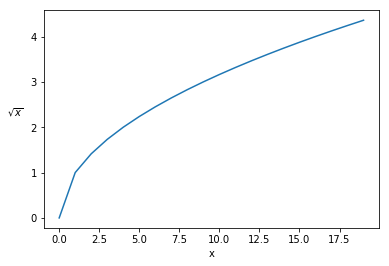

In [50]:
x = range(20)
y = [i ** 0.5 for i in x]
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel(r'$\sqrt{x}$', rotation=0, labelpad=15);

* En la primer y segunda línea estamos "generando" datos.
* En la tercer línea decimos que queremos generar un gráfico del tipo `plot` (ya veremos que los hay de otros tipos), donde graficaremos `x` vs `y`.
* En la cuarta y quinta línea agregamos rótulos a los ejes. En la quinta línea usamos la misma notación usada por [$LaTeX$](https://es.wikipedia.org/wiki/LaTeX) para escribir fórmulas matemáticas. $LaTeX$ es un _lenguaje_ para escribir textos que es muy usado en muchas disciplinas científicas para escribir _papers_, _posters_, diapositivas, libros, etc.

Veamos otro ejemplo:

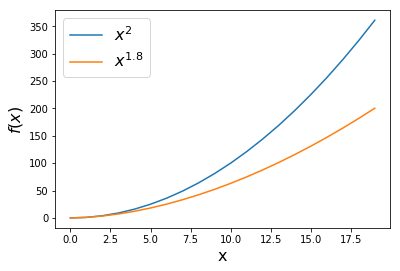

In [51]:
x = range(20)
y = [i ** 2 for i in x]
z = [i ** 1.8 for i in x]
plt.plot(x, y, label=r'$x^2$')
plt.plot(x, z, label=r'$x^{1.8}$')
plt.xlabel('x', fontsize=16)
plt.ylabel(r'$f(x)$', fontsize=16)
plt.legend(fontsize=16);

Existen muchos tipos de gráficos para representar datos. A continuación veremos cinco representaciones comunes para datos unidimensionales:

* histogramas
* _kde plots_
* _stripplot_
* _box plots_
* _violin plots_

### Histogramas

En un [histograma](https://en.wikipedia.org/wiki/Histogram) se representa la frecuencia con la que aparecen los distintos valores en un conjunto de datos. Se utilizan _barras_ contiguas para representar los datos. La superficie (y no la altura) de las barras es proporcional a la frecuencia de datos observados. Los datos son agrupados en _bins_, y suelen graficarse sin normalizar o normalizados. Normalizar implica que la superficie total del histograma suma 1. No hay que confundir los histogramas con los gráficos de barras que se utilizan para comparar valores discretos entre grupos, mientras que los histogramas se usan para representar distribuciones.

Los histogramas son sensibles a la cantidad de _bins_ que se usan. Si usamos unos pocos _bins_ no lograremos capturar la estructura de los datos, si usamos demasiados _bins_ no solo estaremos representando la estructura de los datos si no también el ruido. Esto se ve más claramente si nos vamos a los extremos, por un lado tendríamos un sola barra, por el otro una barra por cada dato.

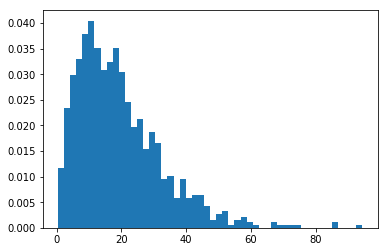

In [52]:
x = np.random.gamma(2, 10, size=1000)

plt.hist(x, bins=50, density=True, cumulative=False);  # probá cambiar los bins, y los demás argumentos.

Aprovechando lo que hemos aprendido hasta el momento generemos un gráfico que muestre la diferencia entre media y mediana

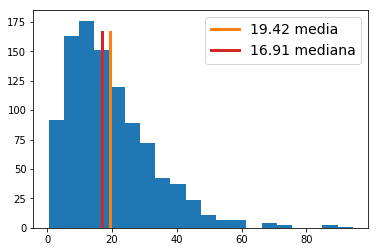

In [53]:
plt.hist(x, bins=20)
media = np.mean(x)
mediana = np.median(x)

plt.axvline(media, ymax=.9, c='C1', lw='3', label='{:.2f} media'.format(media))
plt.axvline(mediana, ymax=.9, c='C3', lw='3', label='{:.2f} mediana'.format(mediana))
plt.legend(fontsize=14);

### Kernel Density plot

Es una forma _suavizada_ de un histograma. Un gráfico [_KDE_](https://en.wikipedia.org/wiki/Kernel_density_estimation) se dibuja de la siguiente forma: se reemplaza cada dato por una distribución Gaussiana y luego se suman todas las Gaussianas. En vez de una distribución Gaussiana es posible usar otras distribuciones. El nombre genérico para esas distribuciones cuya suma se usa como aproximación de una función es el de _kernel_. Cualquier función simétrica cuya integral sea 1 puede ser usada como kernel, la Gaussiana es uno de los kernels más usado.

De forma análoga a lo que sucede con los _bins_ los KDE son sensibles a un parámetro llamado _bandwith_. Existen varias _heurísticas_ (reglas empíricas que suelen funcionar bien en la práctica) para ajustar el _bandwith_ de forma automática de acuerdo a los datos.

Es posible usar matplotlib para graficar un kde, pero no existe una función que lo haga de forma automática. Es decir es posible pero requiere de cierto trabajo. Lo mismo sucede con otros tipos de gráficos usados para analizar datos, es por ello que existe una biblioteca llamada Seaborn, la cual _no es más_ que una colección de funciones escritas usando matplotlib.

In [54]:
import seaborn as sns

Usando Seaborn, podemos hacer un kde de forma muy simple

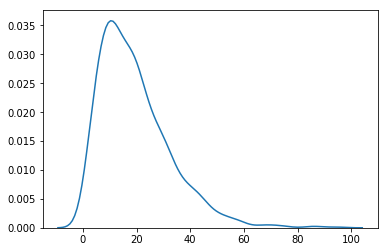

In [55]:
sns.kdeplot(x);  #también ver la función sns.distplot()

Como Seaborn está escrito usando Matplotlib, podemos modificar los gráficos realizados con Seaborn usando Matplotlib.

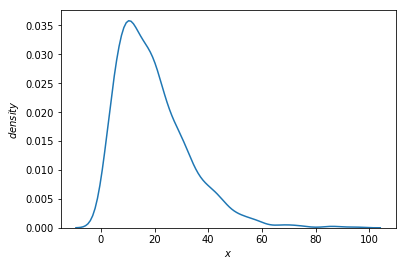

In [56]:
sns.kdeplot(x)
plt.xlabel('$x$')
plt.ylabel('$density$');

### Stripplot

Este tipo de gráfico sirve para visualizar un conjunto de datos donde una variable es métrica y las demás son categóricas.

Para visualizarlos podemos usar la función `stripplot` de seaborn (un gráfico similar es el `swarmplot`). Los stripplot se suelen graficar agregado un poco de ruido (_jitter_ en inglés) a lo largo del eje de las $x$, esto es simplemente un _truco_ para facilitar la visualización de los puntos, que caso contrario caerían todos en una misma línea ya que las variables categóricas no tienen dispersión.

Puede ser útil en si mismo o puede ser usado superpuesto sobre un _boxplot_ o _violinplot_.

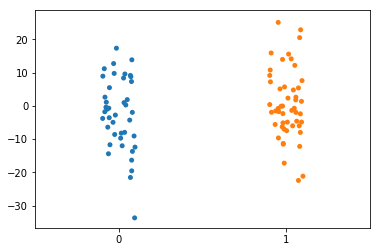

In [57]:
y0 = np.random.normal(0, 10, size=42)
y1 = np.random.normal(-1, 10, size=50)
sns.stripplot(data=[y0, y1], jitter=True);

### Gráficos de cajas o de bigotes (Box plot o Wisker-plot)

Los [gráficos de caja](https://en.wikipedia.org/wiki/Box_plot) son una forma de graficar distribuciones basadas en cuartiles. Al igual que el `stripplot` este tipo de gráficos es muy útil cuando se quieren comparar varios grupos de datos en simultáneo. La caja está delimitada por el primer y tercer cuartil, mientras que la línea dentro de la caja es el segundo cuartil (la mediana). Los _bigotes_ pueden indicar varias medidas, por eso es siempre importante leer/escribir la leyenda o texto que acompaña a un boxplot, a veces se usa una desviación estandar, otras veces los percentiles 2 y 98, otras veces (como en el gráfico a continuación) es una función del rango intercuartil y los valores por fuera de los bigotes se suelen considerar como datos aberrantes (ver más adelante).

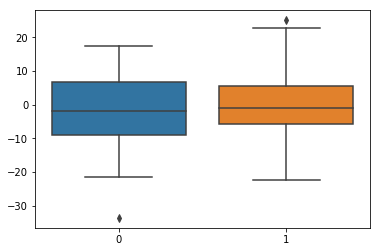

In [58]:
sns.boxplot(data=[y0, y1]);

### Gráficos de violín (violin plot)

Los gráficos de [violín](https://en.wikipedia.org/wiki/Violin_plot) son una combinación de gráficos de caja con kde.

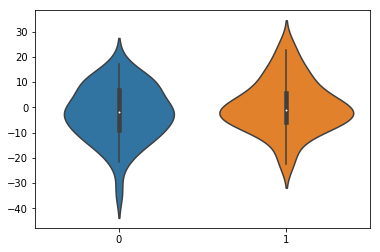

In [59]:
sns.violinplot(data=[y0, y1]);

### Datos aberrantes

Los datos aberrantes (_outliers_) son valores que están muy alejados de la mayoría de los valores de una distribución. Los datos aberrantes pueden ser errores de medición, errores al procesar los datos o incluso valores correctos pero inusuales (sobre todo cuando la muestra es pequeña). Siempre es buena idea revisar si nuestros datos contienen datos aberrantes y en muchos casos puede llegar a ser conveniente removerlos. Siempre que se remueve un dato aberrante deberá reportarse que fue removido y explicar cual fue el criterio usado para removerlos. Es importante destacar que la decisión de remover datos aberrantes no debe ser tomada a la ligera. Si un supuesto dato _aberrante_ fuese un valor correcto quizá nos estaría indicando que no comprendemos del todo el fenómeno estudiado y al dejarlo de lado podríamos estar perdiéndo información importante!

Existen varios criterios para identificar datos aberrantes. Dos muy usados son:
   * todo valor por debajo de $\mu$-n$\sigma$ y por encima de $\mu$+n$\sigma$. Donde n = 1, 2, 3...
   * Se define el rango intercuartil como $IQR = q3 − q1 = p75-p25$ y se define como _aberrante_ todo valor por debajo de $q1-1.5*IQR$ y por encima de $q3+1.5*IQR$

El primer criterio suele ser usado para distribuciones que se asemejan a Gaussianas, mientras que el segundo es más general ya que el rango intercuartil es una medida más robusta de la dispersión de una distribución que la desviación estándar. El valor de 1.5 es totalmente arbitrario y un valor que se viene usando desde que esta idea fue propuesta. Si nuestros datos son aproximadamente gaussianos, entonces este criterio excluye menos del 1% de los datos.

Según la desigualdad de Chebyshev (y bajo ciertas condiciones), al menos  $1 - \frac{1}{k^2}$ de los valores de una distribución están dentro $k$ desviaciones estándar. Es decir casi todos los valores de una distribución de probabilidad están cerca de la media. Por lo tanto el 75% y el 89% de los valores de una distribución se encuentran dentro de 2 y 3 desviaciones estandar, respectivamente. La desigualdad de Chebyshev indica una cota, para varias distribuciones es posible que los valores se encuentren mucho más concentrados alrededor de la media. Por ejemplo esto sucede con las curvas Gaussianas. Para una curva Gaussiana se cumple la regla 68-95-99,7 es decir el 68 por cierto de los datos se encuentra dentro de 1 desviación estándar, el 95 dentro de 2 y el 99.7 dentro de 3.


<img src='imagenes/Boxplot_vs_PDF.svg' alt="IQR_gaussiana", width=400, height=400>

## Relación entre dos variables

Los gráficos que hasta ahora hemos visto sirven para visualizar una variable por vez, (aunque `sns.kdeplot` soporta la visualización de dos variables). Sin embargo, en muchos casos necesitamos entender la relación entre dos variables. Dos variables están inter-relacionadas, si el conocer el valor de una de ellas provee de información sobre el valor de la otra.

###  Gráfico de dispersión

Un [gráfico de dispersión](https://en.wikipedia.org/wiki/Scatter_plot) es un gráfico que utiliza las coordenadas cartesianas para mostrar los valores de dos variables en simultáneo. Estos gráficos son la forma más simple de visualizar la relación entre dos variables.

Supongamos que tenemos dos variables, que creativamente llamaremos $x$, $y$.

In [60]:
x = np.random.normal(size=1000)
y = np.random.normal(loc=x, scale=1)

Usando matplotlib podemos graficar ambas variables usando la función _scatter_

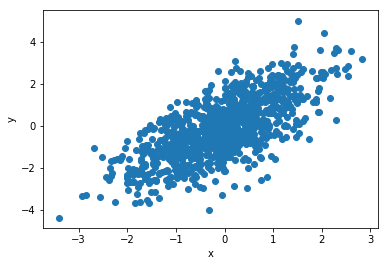

In [61]:
plt.scatter(x, y, alpha=1)
plt.xlabel('x')
plt.ylabel('y');

Seaborn provee de múltiples opciones para visualizar relaciones entre dos variables, varias de ellas están contenidas en la función _joinplot_. Esta función además de mostrar el gráfico de dispersión muestra las distribuciones _marginales_ de $x$ e $y$.

/home/osvaldo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


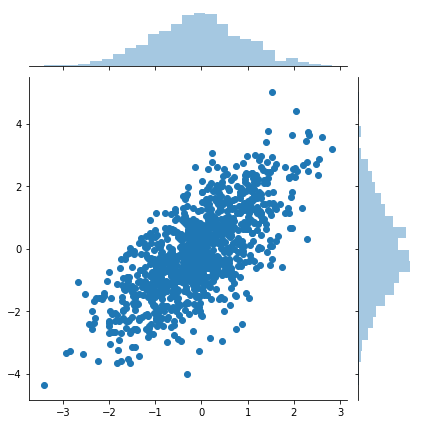

In [62]:
sns.jointplot(x, y,  kind='scatter', stat_func=None);

Cuando tenemos una gran cantidad de datos los puntos  de un _scatter plot_ empiezan a superponerse y puede que ciertos patrones pasen desapercibidos. En estos casos puede ser conveniente no mirar los datos _crudos_ si no que agruparlos de alguna forma.

El siguiente gráfico usa un _kernel density estimation_ como vimos anteriormente, lo hace tanto para las distribuciones marginales como para la distribución conjunta.

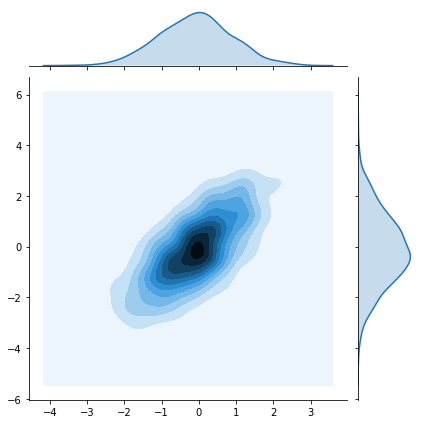

In [63]:
sns.jointplot(x, y,  kind='kde', stat_func=None);

Una alternativa a un KDE bidimensional es el _hexbin_. Este tipo de gráfico es una versión 2D de un histograma. El nombre se debe a que los datos son agrupados en celdas hexagonales. ¿Por qué hexágonos en vez de cuadrados o triángulos? Simplemente porque las celdas hexagonales introducen una menor distorsión en los datos que otras opciones. Esto se debe a las siguientes razones:

* Los hexágonos se relacionan con sus vecinos por lados (los cuadrados y triángulos lo hacen por vértices y lados). Es decir se vinculan con sus vecinos de forma más _simétrica_. 
* Los hexágonos son el polígono con mayor número de lados que mejor cubren ([teselan](https://es.wikipedia.org/wiki/Teselado)) una superficie plana.
* Los hexágonos introducen menor distorsión visual que por ejemplo los cuadrados. Un malla cuadrada hace que tendamos a mirar en sentido horizontal y vertical.

Los hexbin son útiles cuando necesitamos visualizar muchos datos. Por muchos me refiero a números por encima de las centenas de miles de datos. Una ventaja de los _hexbin_ sobre los KDE es que el costo computacional es menor.

/home/osvaldo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


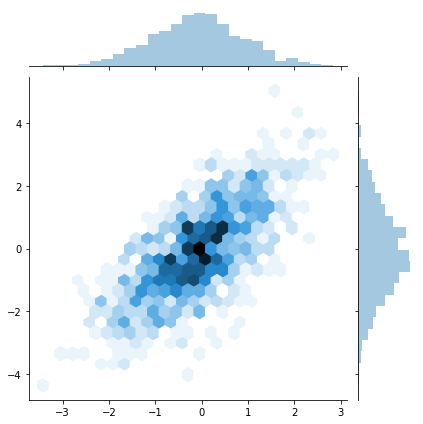

In [64]:
sns.jointplot(x, y,  kind='hex', stat_func=None);  # ver también plt.hexbin();

Una alternativa para evitar que algunos puntos opaquen al resto, en un gráfico de dispersión _común_, es hacer los puntos semitransparentes. En matplotlib la transparencia de los objetos es controlada mediante un parámetro llamado _alpha_ que va entre 0 y 1. Este es un buen momento para volver algunas celdas atrás y ver como este y otros parámetros pueden ser usados para modificar las gráficas realizadas.

### Correlación

Al trabajar con dos variables es común preguntarse por la relación entre ellas. Decimos que dos variables están relacionadas si una provee _información_ sobre la otra. Si en cambio una variable no ofrece información sobre otra decimos que son independientes. 

La correlación es una medida de la dependencia de dos variables. Existen varios coeficientes de correlación el más comunmente usado es el coeficiente de correlación de Pearson. Este coeficiente solo sirve para medir relaciones lineales entre variables. El coeficiente de correlación de Pearson es el resultado de dividir la covarianza de las dos variables ($E[(\bar x - x)(\bar y - y)]$) por el producto de sus desviaciones estándar:

$$\rho_{(x,y)}={E[(\bar x - x)(\bar y - y)] \over \sigma_x\sigma_y}$$


En palabras (que puede ser más oscuro que en fórmulas), el coeficiente de correlación de Pearson indica como cambia una variable al cambiar la otra respecto de la variación intrínseca de ambas variables.

¿Por qué usar el coeficiente de Pearson y no directamente la covarianza? Fundamentalmente por que la interpretación es más simple. Al dividir por el producto de las varianzas estámos estandarizando la covarianza, obteniendo un coeficiente que no tiene dimensión y que solo puede variar entre -1 y 1 sin importar las unidades de nuestras variables.

La función _joinplot_, que vimos en el apartado anterior, por defecto nos devuelve el valor del coeficiente de correlación de Person, junto con un _valor p_ cuyo significado estudiaremos en el capítulo 4.

/home/osvaldo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


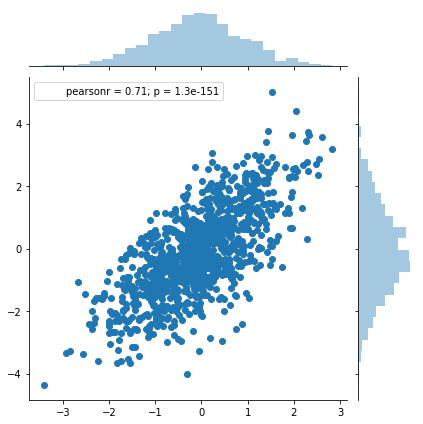

In [65]:
sns.jointplot(x, y,  kind='scatter');

Identificar correlaciones puede ser útil para entender como dos variables se relacionan y para predecir una a partir de la otra. Es por ello que muchas veces además de visualizar la relación entre variables se estiman modelos que _ajustan_ a los datos. Como por ejemplo líneas rectas. En el tercer curso de este programa veremos como crear modelos lineales y no-lineales. Por ahora simplemente nos conformaremos con dejar que seaborn ajuste los datos a un recta por nosotros.

/home/osvaldo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


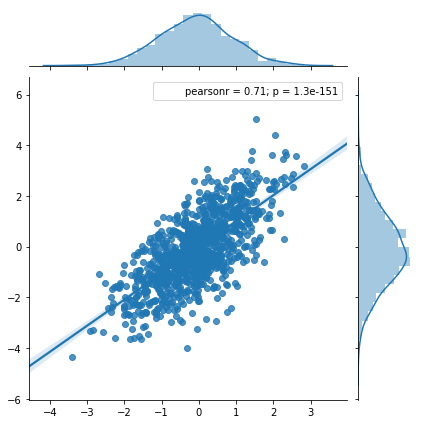

In [66]:
sns.jointplot(x, y,  kind='reg');

En la siguiente imagen se puede ver varios conjuntos de datos y sus respectivos coeficientes de correlación de Pearson. Es importante notar que el coeficiente de correlación de Pearson refleja la linearidad y la dirección de dicha linearidad (primera fila), pero no la pendiente de dicha relación (fila del medio). Tampoco es capaz de capturar relaciones no-lineales. En la fila del medio la línea con pendiente cero tiene un coeficiente de correlación de Pearson indefinido, ya que la varianza de la variable $y$ es 0.

<img src='imagenes/Correlación.png' alt="correlación", width=600, height=600>

#### Correlación y causalidad

Si existe algún tipo de mecanismo que hace que una variable dependa de otra deberá existir correlación (aunque no necesariamente lineal). Pero lo opuesto no es siempre cierto, dos variables pueden estar correlacionadas sin que exista ningún tipo de mecanismo que las vincule. Dado el gran conjunto de variables que es posible medir no debería ser sorprendente que existan correlaciones [espurias](http://www.tylervigen.com/). Por ejemplo en la siguiente figura se puede ver que el número de piratas y la media de la temperatura global están inversamente correlacionados.

<img src='imagenes/pirate_temp.png' alt="Pirates_temp", width=600, height=600> 

Este gráfico fue creado a propósito para ilustrar, entre otros puntos, que correlación no implica causalidad (nótese además que el orden de los datos en el eje $x$ es erróneo y la escala es al menos _problemática_). Para más detalles del origen de esta gráfica leer esta entrada de [wikipedia](https://es.wikipedia.org/wiki/Pastafarismo#Los_piratas_y_el_calentamiento_global) 

La aparente relación entre las variables temperatura media y cantidad de piratas podría ser explicada de varias formas, quizá es pura casualidad o quizá se podría establecer que los cambios introducidos por la revolución industrial terminaron por un lado aumentando la cantidad de $CO_2$ (y otros gases de invernadero) y por el otro produciendo cambios socio-culturales y tecnológicos que llevaron (luego de una larga cadena de sucesos) a la disminución de los piratas. Pero ¡no es cierto que podamos contrarrestar el calentamiento global simplemente aumentando la cantidad de piratas!

Para poder establecer una relación causal a partir de una correlación hace falta poder establecer y probar la existencia de un mecanismo que vincule ambas variables. Espero que este ejemplo haya servido para ayudarles a entender que correlación no implica  causalidad. 

<img src='http://imgs.xkcd.com/comics/correlation.png' alt="xkcd">

## SciPy

NumPy junto con SciPy son el núcleo de todo el ecosistema científico de Python. Al trabajar en computación científica muchas veces necesitaremos acceso a rutinas numéricas para realizar tareas como interpolar, integrar, optimizar, realizar análisis estadísticos, procesar audio, procesar imágenes, etc.

SciPy es una librería de computación científica construida encima de NumPy que nos ofrece muchas de estas funciones. Al igual que como sucede con NumPy, SciPy cuenta con muchas rutinas rápidas, confiables y facilmente disponibles. SciPy es también el nombre de un grupo de conferencias donde participan usuarios y desarrolladores de herramientas de computación científica en Python.

No es muy común importar todas las funciones de SciPy, en general se importan submodulos o incluso funciones particulares. Si necesitaramos funciones estadísticas probablemente las importaríamos de la siguiente forma:

In [67]:
from scipy import stats

Y luego lo usaríamos como:

In [68]:
stats.describe(x)

DescribeResult(nobs=1000, minmax=(-3.412953441064071, 2.83051142226678), mean=-0.08813965996962426, variance=0.9359438582647219, skewness=-0.010953614762509473, kurtosis=-0.022064750365117458)

O podríamos querer calcular una regresión lineal:

In [69]:
stats.linregress(x, y)

LinregressResult(slope=1.0304513513855125, intercept=-0.027661316080246343, rvalue=0.7058204645432428, pvalue=1.3349920058793072e-151, stderr=0.032737149781081894)

En general para usar SciPy no hay que aprender mucho más que lo que ya aprendimos de NumPy y luego leer la documentación de cada función específica que necesitemos usar. En los próximos capítulos veremos algunos ejemplos de su uso a medida que vayamos necesitándolo.

## Ejercicios

Vamos a explorar que otras funciones nos ofrece NumPy, para ello podemos usar los métodos de instrospección que ofrece Jupyter y la [documentación de NumPy](https://docs.scipy.org/doc/numpy/user/index.html)·

1. Existen muchas otras operaciones que se pueden hacer sobre arreglos y muchas otras funciones que ofrece NumPy. Exploremos las siguientes:
    * `reshape`
    * `concatenate`
    * `hstack`
    * `vstack`
    * `split`
    * `flatten`
    * `sort`
    * `argsort`
    * `loadtxt`

2. Explorar la documentación de NumPy y buscar alguna función que no hayamos visto en esta notebook ni en el ejemplo anterior. Explicar brevemente que hace y generar un ejemplo simple de aplicación.

3. Generar datos gaussianos con np.random.randn(size=s) donde `s` es igual a 10, 100 o 1000 y para cada caso vamos a contar cuantos puntos son _outliers_ de acuerdo a la regla del rango intercuartil (usando el valor de 1.5) y cuantos valores son _aberrantes_ usando 2 y 3 desviaciones estándar. Para asegurarse de tener números _confiables_ repetir el ejercicio varias veces para cada `s` y reportar el número promedio de datos aberrantes y su desviación estándar.

4. Comparar las formulas de la varianza y covarianza y explicar por que es correcto decir que la varianza es la covarianza de una variable respecto de ella misma.

5. Escribir una función que calcule el coeficiente de correlación de Pearson. Evaluar que el resultado es correcto comparándola con el resultado de `stats.linregress`

6. Generar 3 o 4 conjuntos de datos utilizando NumPy. Podés intentar combinando métodos `random`, funciones trigonométricas, logaritmos, etc.

7. Hacer gráficos unidimensionales de los datos generados en el punto anterior. Hacer al menos un ejemplo usando solo matplotlib, otro usando solo seaborn y otro usando matplotlib junto con seaborn. 

8. Hace al menos un gráfico bidimensionales que refleje la relación entre dos variables generadas en el punto 6. Incluir como parte de la leyenda, el valor del coeficiente de correlación de Pearson (usando tanto la función creada en 5 como `stats.linregress`)


## Para seguir leyendo

* [wikipedia :-)](http://en.wikipedia.org)
* [Think Stats](http://greenteapress.com/thinkstats/)
* [Data Analysis with Open Source Tools](http://shop.oreilly.com/product/9780596802363.do)